# Linear  Classifier with PyTorch: Softmax Model 


This projects solves an image classification problem using a simple softmax model rather than a Deep neural network. 


<h2 id="auxiliary">Imports and Auxiliary Functions</h2>


In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import glob
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torch.nn as nn
from torch import optim 
import skillsnetwork 

## Downloading the Data


downloading the file that contains the images:


In [2]:
await skillsnetwork.prepare("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/concrete_crack_images_for_classification.zip", path = "/resources/data", overwrite=True)

  0%|          | 0/40000 [00:00<?, ?it/s]

Saved to '../../data'


## Creating the Dataset Class

In [58]:
# Define the dataset class
class CustomDataset(Dataset):
    def __init__(self, transform=None, train=True):
        directory = "/resources/data"
        positive = "Positive"
        negative = "Negative"

        positive_file_path = os.path.join(directory, positive)
        negative_file_path = os.path.join(directory, negative)
        positive_files = [os.path.join(positive_file_path, file) for file in os.listdir(positive_file_path) if file.endswith(".jpg")]
        positive_files.sort()
        negative_files = [os.path.join(negative_file_path, file) for file in os.listdir(negative_file_path) if file.endswith(".jpg")]
        negative_files.sort()
        
        if train:
            self.all_files = positive_files[:10000] + negative_files[:10000]
            self.labels = torch.cat((torch.ones(10000), torch.zeros(10000)), dim=0)
        else:
            self.all_files = positive_files[10000:] + negative_files[10000:]
            self.labels = torch.cat((torch.ones(len(positive_files) - 10000), torch.zeros(len(negative_files) - 10000)), dim=0)

        self.transform = transform

    def __len__(self):
        return len(self.all_files)

    def __getitem__(self, idx):
        image = Image.open(self.all_files[idx])
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

<h2 id="trasforming_Data_object">Transform Object and Dataset Object</h2>


Creating a transform object, that uses the <code>Compose</code> function.


In [59]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
# transforms.ToTensor()
#transforms.Normalize(mean, std)
#transforms.Compose([])

transform =transforms.Compose([ transforms.ToTensor(), transforms.Normalize(mean, std)])


Creating object for the training data  <code>dataset_train</code> and validation <code>dataset_val</code>. Using the transform object to convert the images to tensors using the transform object:


In [60]:
train_dataset = CustomDataset(transform=transform, train=True)
val_dataset = CustomDataset(transform=transform, train=False)

shape of the image:


In [61]:
dataset_train[0][0].shape

torch.Size([3, 227, 227])

it's a color image with three channels:


In [62]:
size_of_image=3*227*227
size_of_image

154587

## Creating Softmax Model and Training the Model

<b> Creating a custom module for Softmax for two classes,called model. The input size is the <code>size_of_image</code>


<b>Parameter Values</b>
   <li>learning rate:0.1 </li>
   <li>momentum term:0.1 </li>
   <li>batch size training:5</li>
   <li>Loss function:Cross Entropy Loss </li>
   <li>epochs:5</li>
   <li>set: torch.manual_seed(0)</li>


In [ ]:
torch.manual_seed(0)

<b>Custom Module:</b>


In [70]:
# Define the model
class SoftMax(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(SoftMax, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    # Prediction
    def forward(self, x):
        z = self.linear(x)
        return z

# Set random seed for reproducibility
torch.manual_seed(0)

# Define parameters
learning_rate = 0.1
momentum_term = 0.1
batch_size_training = 5
criterion = nn.CrossEntropyLoss()
epochs = 5

<b>Model Object:</b>


In [71]:
input_size = 3 * 227 * 227
output_size = 2

model = SoftmaxModel(input_size, output_size)

<b>Optimizer:</b>


In [72]:
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum_term)  

<b>Criterion:</b>


In [73]:
criterion = nn.CrossEntropyLoss()

<b>Data Loader Training and Validation:</b>


In [74]:
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size_training, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size_training)

<b>Training Model with 5 epochs (Takes approx 35 minutes) </b>


In [78]:
# Training loop
n_epochs = 5
loss_list = []
accuracy_list = []
N_test = len(val_dataset)

def train_model(n_epochs):
    for epoch in range(n_epochs):
        for x, y in train_loader:
            optimizer.zero_grad()
            z = model(x.view(-1, 3*227*227))
            loss = criterion(z, y.long())
            loss.backward()
            optimizer.step()
            
        correct = 0
        # perform a prediction on the validationdata  
        for x_test, y_test in validation_loader:
            z = model(x_test.view(-1, 3*227*227))
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / N_test
        loss_list.append(loss.data)
        accuracy_list.append(accuracy)

train_model(n_epochs)


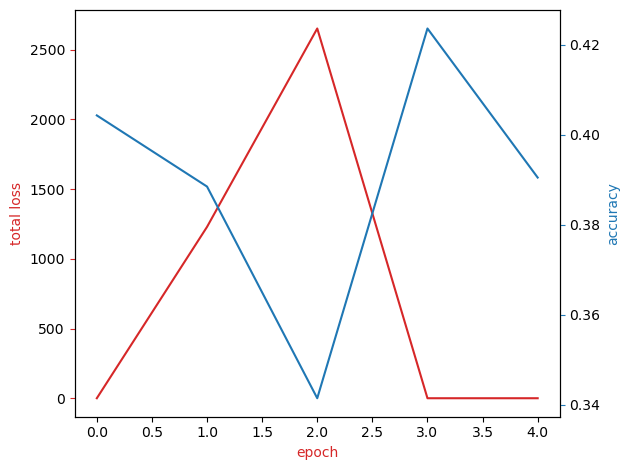

In [79]:
# Plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list,color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('total loss',color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)  
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()